# Term Project - Oscar Barrera

Ligo detects gravitational waves from black hole mergers. Some of these mergers involved a BH of mass > 50 solar masses. It so happens that there is a mass gap in the formation of BH, where we cannot explain masses greater than 50 solar masses through stellar core collapse. We hypothesize that the unusual mass in these mergers is the product of hierarchical mergers; that is, the primary and secondary masses involved in a GW event may themselves be the product of previous mergers.  It is the purpose of this term project to investigate and classify potential hierarchical mergers from the remnant mass of a BH.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from scipy import interpolate
import seaborn as sns
%matplotlib inline

I compiled all the available GW data from LIGO papers and uploaded it as a CSV

In [2]:
GWMergers = pd.read_csv('/blue/ast4930/share/GW_MERGERS.csv')

In [3]:
GWMergers

Name  Mass 1 (M☉)  Mass 2 (M☉)  Total Mass (M☉)  \
0          GW190814         23.2         2.59             25.8   
1   GW190924_021846          8.8         5.00             13.9   
2   GW190930_133541         12.3         7.80             20.3   
3   GW190720_000836         13.3         7.80             21.3   
4   GW190728_064510         12.2         8.10             20.5   
5          GW190412         30.0         8.30             38.4   
6   GW190707_093326         11.5         8.40             20.0   
7   GW190828_065509         23.8        10.20             34.1   
8   GW190512_180714         23.0        12.50             35.6   
9   GW190708_232457         17.5        13.10             30.8   
10  GW190513_205428         35.3        18.10             53.6   
11  GW190408_181802         24.5        18.30             42.9   
12  GW190719_215514         35.2        20.20             55.8   
13  GW190527_092055         36.2        22.80             58.5   
14  GW190413_052954         33.4        23.40             56.9   
15  GW190630_185205         35.0        23.60             58.8   
16  GW190915_235702         34.9        24.40             59.5   
17  GW190517_055101         36.4        24.80             61.9   
18  GW190929_012149         64.7        25.70             90.6   
19  GW190828_063405         31.8        25.90             57.5   
20  GW190803_022701         36.1        26.70             62.7   
21  GW190514_065416         36.9        27.50             64.2   
22  GW190909_114149         43.2        27.60             71.2   
23  GW190731_140936         39.3        28.00             67.1   
24  GW190503_185404         42.9        28.50             71.3   
25  GW190727_060333         37.2        28.80             65.8   
26  GW190413_134308         45.4        30.90             76.1   
27  GW190424_180648         39.5        31.00             70.7   
28  GW190421_213856         40.6        31.40             71.8   
29  GW190521_074359         42.1        32.70             74.4   
30  GW190620_030421         55.4        35.00             90.1   
31  GW190910_112807         43.5        35.10             78.7   
32  GW190706_222641         64.0        38.50            101.6   
33  GW190519_153544         64.5        39.90            104.2   
34  GW190701_203306         53.6        40.80             94.1   
35  GW190602_175927         67.2        47.40            114.1   
36         GW190521         91.4        66.80            157.9   

    Final Mass (M☉)  Xeff    Xf  
0              25.6  0.00  0.28  
1              13.3  0.03  0.67  
2              19.3  0.14  0.72  
3              20.3  0.18  0.72  
4              19.5  0.12  0.71  
5              37.3  0.25  0.67  
6              19.2 -0.05  0.66  
7              32.9  0.08  0.65  
8              34.2  0.03  0.65  
9              29.4  0.02  0.69  
10             51.3  0.12  0.69  
11             41.0 -0.03  0.67  
12             52.9  0.35  0.80  
13             55.9  0.13  0.73  
14             54.3  0.01  0.69  
15             56.1  0.10  0.70  
16             56.8  0.03  0.71  
17             57.8  0.53  0.87  
18             87.5  0.03  0.64  
19             54.5  0.19  0.76  
20             59.9 -0.01  0.69  
21             61.6 -0.16  0.64  
22             68.3 -0.03  0.68  
23             63.9  0.08  0.71  
24             68.2 -0.02  0.67  
25             62.6  0.12  0.73  
26             72.8 -0.01  0.69  
27             67.1  0.15  0.75  
28             68.6 -0.05  0.68  
29             70.7  0.09  0.72  
30             85.4  0.34  0.80  
31             75.0  0.02  0.70  
32             96.3  0.32  0.80  
33             98.7  0.33  0.80  
34             90.0 -0.06  0.67  
35            108.8  0.10  0.71  
36            150.3  0.06  0.73

We want to see if there is any correlation between the primary and secondary components of the mass and the remnant mass of the Black Hole.

In [4]:
#Call in variables from GWMergers file to use in extrapolation
M1 = GWMergers['Mass 1 (M☉)']
M2 = GWMergers['Mass 2 (M☉)']
MF = GWMergers['Final Mass (M☉)']

Let's plot the data and see if there is anything that stands out

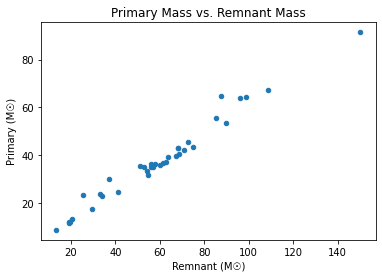

In [5]:
GWMergers.plot.scatter(x='Final Mass (M☉)', y = 'Mass 1 (M☉)')
plt.title('Primary Mass vs. Remnant Mass')
plt.xlabel('Remnant (M☉)')
plt.ylabel('Primary (M☉)')
plt.show()

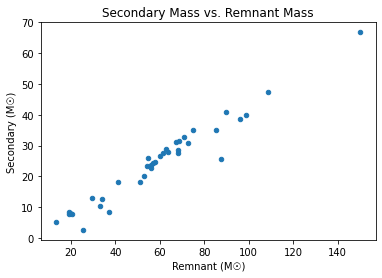

In [6]:
GWMergers.plot.scatter(x='Final Mass (M☉)', y = 'Mass 2 (M☉)')
plt.title('Secondary Mass vs. Remnant Mass')
plt.xlabel('Remnant (M☉)')
plt.ylabel('Secondary (M☉)')
plt.show()

Since it appears that there is a linear correlation between the Remnant Mass and the Primary / Secondary Masses, we can try to extrapolate the values for a given Black Hole merger. Lets try GW190521

In [7]:
#Define function to extrapolate primary or secondary value from plot

def extrap(mass,aprox):
    f = interpolate.interp1d(MF, mass, fill_value = "extrapolate")
    A = f(aprox)

    if mass is M1:
        name = 'Primary Mass'
    if mass is M2:
        name = 'Secondary Mass'
    
    print('For a Remnant Mass of', aprox, name, 'was ~', np.around(A,2), '(M☉)')

GW190521 -> Final Mass of 150 (M☉)

In [8]:
extrap(M1, 150)
extrap(M2, 150)

For a Remnant Mass of 150 Primary Mass was ~ 91.23 (M☉)
For a Remnant Mass of 150 Secondary Mass was ~ 66.66 (M☉)


This is very close to our expected values from LIGO, as
Mass 1: 85;
Mass 2: 66

Now we need to classify which primary or secondary masses will result in a remnant mass in the Mass Gap. Lets assign labels

In [9]:
#Label array
Label = []
#array of masses to classify
massvalue = np.arange(5,150,.5)

#Define function to extrapolate primary or secondary value from plot
def extrapolate(mass,aprox):
    f = interpolate.interp1d(MF, mass, fill_value = "extrapolate")
    A = f(aprox)

    if mass is M1:
        name = 'Primary Mass'
    if mass is M2:
        name = 'Secondary Mass'
    return A

for i in massvalue:
    if extrapolate(M1, i) > 50:
        Label += [1]
    else:
        Label += [0]

Now we have a Label which predicts if a BH merger resulted from hierarchical mergers. Lets see what it looks like with GW data

In [10]:
LabelsGW = []
for i in GWMergers['Final Mass (M☉)']:
    if extrapolate(M1, i) > 50:
        LabelsGW += [1]
    else: LabelsGW += [0]

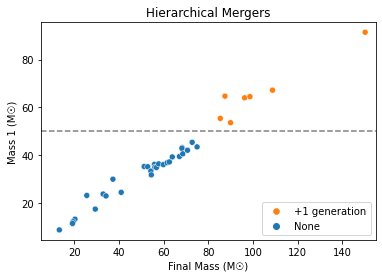

In [11]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(x = GWMergers['Final Mass (M☉)'], y= GWMergers['Mass 1 (M☉)'], hue = LabelsGW)

ax.hlines(50,5,155, linestyles = "dashed", colors = 'grey')
plt.xlim(5,155)

plt.title('Hierarchical Mergers')
leg = ax.legend(labels=["+1 generation", "None"], loc = "lower right")

leg.legendHandles[0].set_color('C1')
leg.legendHandles[1].set_color('C0')

plt.show()


Now Lets use an actual Black Hole Merger formula https://arxiv.org/pdf/1406.7295.pdf

In [12]:
#define m1 and m2 merger
def MremArray(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    
    sol_set = []
    
    for i in range(len(mass1)):
        MSum3 = mass1.item(i) + mass2.item(i)
        n3 = (mass1.item(i) * mass2.item(i)) / MSum3 
        dm3 = (mass1.item(i) - mass2.item(i)) / MSum3
        
        if mass1.item(i) > mass2.item(i):
        
            if mass2.item(i)/mass1.item(i) > 1/3:
                Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
            else:
                Mrem_Mass = mass1.item(i) + mass2.item(i)
        else: 
            Mrem_Mass = 0
            
        sol_set += [Mrem_Mass]
    return sol_set



Lets populate a data set from this formula

In [13]:
#set up array of masses
m1_array= []
for i in np.arange(5,150,.5):
    m1_array += [i]
    
m2_array= []
for i in np.arange(5,70,.5):
    m2_array += [i]
    
#create array of solution set
xcoor = []
ycoor = []
for i in m1_array:
    for j in m2_array:
        if i > j:
            xcoor += [i]
            ycoor += [j]



Mrem_sol = np.around((MremArray(np.array(xcoor),np.array(ycoor))),2)

Merger = pd.DataFrame(list(zip(xcoor,ycoor,Mrem_sol)), columns = ['Primary','Secondary','Remnant'])



This results in a dataframe showing every possible combination of BH mergers and the remnant mass that results from it

In [14]:
Merger

Primary  Secondary  Remnant
0          5.5        5.0     9.99
1          6.0        5.0    10.47
2          6.0        5.5    10.94
3          6.5        5.0    10.96
4          6.5        5.5    11.43
...        ...        ...      ...
29180    149.5       67.5   206.85
29181    149.5       68.0   207.39
29182    149.5       68.5   207.93
29183    149.5       69.0   208.47
29184    149.5       69.5   209.00

[29185 rows x 3 columns]

We will assume a gaussian distribution for the probability density of the remnant mass deduced from the observed GW mergers

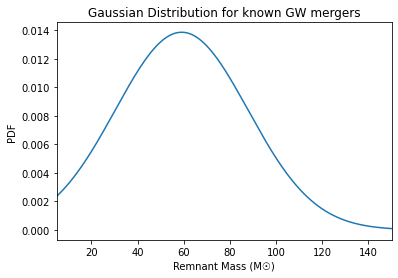

In [15]:
import scipy
import statistics
mean = statistics.mean(GWMergers['Final Mass (M☉)'])
standard_deviation = statistics.stdev(GWMergers['Final Mass (M☉)'])

x_values = np.arange(5, 210, 0.01)
y_values = scipy.stats.norm(mean, standard_deviation)

plt.plot(x_values, y_values.pdf(x_values))
plt.xlim(5,150)
plt.title('Gaussian Distribution for known GW mergers')
plt.xlabel('Remnant Mass (M☉)')
plt.ylabel('PDF')
plt.show()

Now lets assign this PDF as a weight to our Merger data

In [16]:
PDF = pd.DataFrame(list(zip(np.around(x_values,2), y_values.pdf(x_values))), columns = ['Mass', 'Probability'])
PDF.Mass = PDF.Mass.astype(float)

In [17]:
BlackHoles = PDF.merge(Merger, left_on = 'Mass', right_on = 'Remnant')
BlackHoles = BlackHoles.drop(columns = 'Mass')

Lets add Label (since we know ground truth of was there a BH in the mass gap)

In [18]:
BlackHoleLabel = []
for i in range(len(BlackHoles)):
    if BlackHoles['Primary'][i] > 50:
        BlackHoleLabel += [1]
    else: BlackHoleLabel += [0]
BlackHoles['Label'] = BlackHoleLabel
BlackHoles

Probability  Primary  Secondary  Remnant  Label
0      3.223528e-03      5.5        5.0     9.99      0
1      3.316334e-03      6.0        5.0    10.47      0
2      3.408875e-03      6.0        5.5    10.94      0
3      3.412849e-03      6.5        5.0    10.96      0
4      3.507105e-03      6.5        5.5    11.43      0
...             ...      ...        ...      ...    ...
29180  2.081912e-08    149.0       69.0   208.02      1
29181  2.055822e-08    148.5       69.5   208.09      1
29182  1.919594e-08    149.5       69.0   208.47      1
29183  1.892043e-08    149.0       69.5   208.55      1
29184  1.744025e-08    149.5       69.5   209.00      1

[29185 rows x 5 columns]

2D Histogram showing Secondary vs Primary Masses

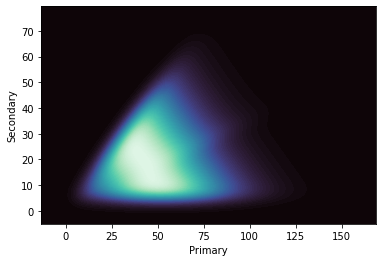

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

sns.kdeplot(
    x = BlackHoles['Primary'], y = BlackHoles['Secondary'],
    fill=True, thresh=0, levels=100, cmap="mako", weights = BlackHoles['Probability']
)

ax.grid(False)

plt.show()

Did the new data follow the original linear trend?

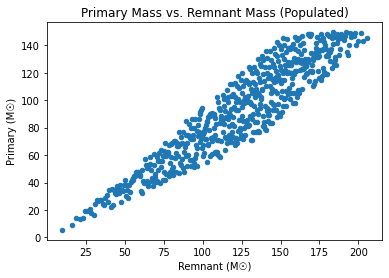

In [20]:
BlackHoles[::50].plot.scatter('Remnant', 'Primary')
plt.title('Primary Mass vs. Remnant Mass (Populated)')
plt.xlabel('Remnant (M☉)')
plt.ylabel('Primary (M☉)')
plt.show()

Lets use Random Forest on this data

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

x = BlackHoles[[('Primary'), ('Secondary'), ('Remnant')]]
y = BlackHoles['Label']

model = RandomForestClassifier(n_estimators=100, oob_score = True, random_state=0)
model.fit(x, y)
print(model.score(x,y))
print(model.oob_score_)


1.0
1.0


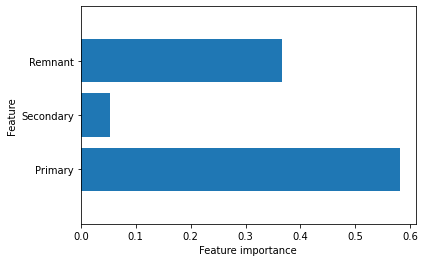

In [22]:
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)

The Random Forest algorithm shows that the secondary mass is the least important in determining whether or not a BH was the product of mergers. This explains how the linear trend comes about, since the lack of secondar mass importance shows that the 'remnant - primary' relationship can be modeled without taking the secondary mass into account

The score of 100 indicates that we can draw a clean boundary which seperates hierarchical vs single generational BH mergers. 

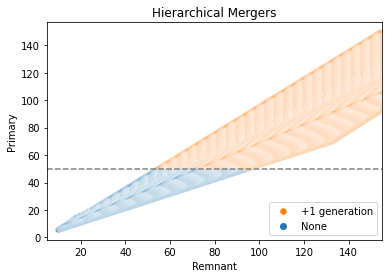

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(x = BlackHoles['Remnant'], y= BlackHoles['Primary'], hue = BlackHoles['Label'])

ax.hlines(50,5,155, linestyles = "dashed", colors = 'grey')
plt.xlim(5,155)

plt.title('Hierarchical Mergers')
leg = ax.legend(labels=["+1 generation", "None"], loc = "lower right")

leg.legendHandles[0].set_color('C1')
leg.legendHandles[1].set_color('C0')

plt.show()


It is clear that below 40 solar masses the probability of a hierarchical scenerio is 0%. For above 100 solar masses the probability is 100% Lets investigate probability as a function of mass between these values.

finding probability of whether a remnant mass is hierarchical or not

In [24]:
numberbh = []
labelnone = []
labelyes = []
sum = 0
sumyes = 0
sumno = 0

import time
tstart = time.time()

for i in PDF['Mass'][::50]:
    for j in range(len(BlackHoles)):
        if BlackHoles['Remnant'][j] == i:
            sum = sum + 1
            if BlackHoles['Label'][j] == 1:
                sumyes = sumyes + 1
            if BlackHoles['Label'][j] == 0:
                sumno = sumno + 1
                
    numberbh += [sum]
    sum = 0
    
    labelnone += [sumno]
    labelyes += [sumyes]
    sumyes = 0
    sumno = 0
    
print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")


Elapsed time: 65.28 seconds


In [25]:
labeldata = pd.DataFrame(list(zip(numberbh, labelyes, labelnone)), columns = ['Number', 'Yes', 'No'])
labeldata

Number  Yes  No
0         0    0   0
1         0    0   0
2         0    0   0
3         0    0   0
4         0    0   0
..      ...  ...  ..
405       0    0   0
406       0    0   0
407       0    0   0
408       1    1   0
409       0    0   0

[410 rows x 3 columns]

Calculate percent by finding total BH at each remnant mass, and how many of those are hierarchical

In [26]:
Percent_Hierarchical = []


for i in range(len(labeldata)):
    if labeldata['Yes'][i] == 0 and labeldata['No'][i] != 0:
        Percent_Hierarchical += [0]
    if labeldata['Yes'][i] != 0 and labeldata['No'][i] == 0:
        Percent_Hierarchical += [1]
    if labeldata['Yes'][i] != 0 and labeldata['No'][i] != 0:
        Percent_Hierarchical += [ labeldata['Yes'][i] / labeldata['Number'][i] ]
    if labeldata['Yes'][i] == 0 and labeldata['No'][i] == 0:
        Percent_Hierarchical += [0]
    

In [27]:
#Turn into dataframe of same dimension 

Hierarchical_Mass = PDF['Mass'][::50]

Hierarchical_Percentage = pd.DataFrame(list(zip(Hierarchical_Mass, Percent_Hierarchical)), 
                                       columns = ['Mass', 'Percent'])
Hierarchical_Percentage

Mass  Percent
0      5.0      0.0
1      5.5      0.0
2      6.0      0.0
3      6.5      0.0
4      7.0      0.0
..     ...      ...
405  207.5      0.0
406  208.0      0.0
407  208.5      0.0
408  209.0      1.0
409  209.5      0.0

[410 rows x 2 columns]

In [28]:
#Calculate where the probability falls to 0 or to 100%

ranges = []
for i in range(len(Hierarchical_Percentage)):
    if Hierarchical_Percentage['Percent'][i] != 0.0 and Hierarchical_Percentage['Percent'][i] != 1.0:
        ranges += [i]
minrange = Hierarchical_Percentage['Mass'][min(ranges)]
maxrange = Hierarchical_Percentage['Mass'][max(ranges)]

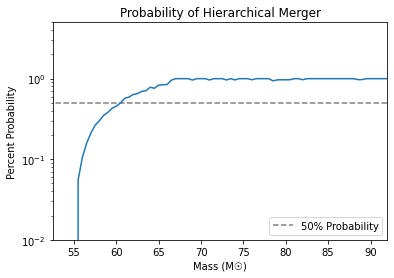

In [29]:
fig = plt.figure()
ax = fig.add_subplot()

ax.hlines(.50,5,155, linestyles = "dashed", colors = 'grey')

plt.plot(Hierarchical_Percentage['Mass'], Hierarchical_Percentage['Percent'])
plt.xlim(minrange - 3,maxrange + 3)
plt.ylim(0.01,5)

ax.set_yscale('log')

plt.title('Probability of Hierarchical Merger')
plt.xlabel('Mass (M☉)')
plt.ylabel('Percent Probability')


leg = ax.legend(labels=['50% Probability'], loc = "lower right")

leg.legendHandles[0].set_color('grey')
leg.legendHandles[0].set_linestyle('dashed')

plt.show()

Lets now remake the blackhole label to count as 1 ony if there is more than 50% change of it being hierarchical

In [30]:
labelcutoff = []

for i in range(len(Hierarchical_Percentage)):
    if Hierarchical_Percentage['Percent'][i] > 0.5:
        labelcutoff += [1]
    else: labelcutoff += [0]

In [31]:
Hierarchical_Percentage['Label_cutoff'] = labelcutoff

#function to round remnant mass to 0.5 (same units as PDF['Mass'])

def myround(x, base=0.5):
    return base * round(x/base)

rounded_remnant = []
for i in range(len(BlackHoles)):
    rounded_remnant += [myround(BlackHoles['Remnant'][i])]

BlackHoles_updated = BlackHoles.copy(deep = True)
BlackHoles_updated['Remnant'] = rounded_remnant
BlackHoles_updated = BlackHoles_updated.merge(Hierarchical_Percentage, left_on = 'Remnant', right_on = 'Mass')
BlackHoles_updated = BlackHoles_updated.drop(columns = ['Mass', 'Percent'])
BlackHoles_updated = BlackHoles_updated[:21000]

This results in the label_cutoff column which is 1 if >50% and 0 if <50% probability of hierarchical merger

In [32]:
BlackHoles_updated

Probability  Primary  Secondary  Remnant  Label  Label_cutoff
0         0.003224      5.5        5.0     10.0      0             0
1         0.003316      6.0        5.0     10.5      0             0
2         0.003409      6.0        5.5     11.0      0             0
3         0.003413      6.5        5.0     11.0      0             0
4         0.003507      6.5        5.5     11.5      0             0
...            ...      ...        ...      ...    ...           ...
20995     0.000077    113.0       47.0    152.0      1             1
20996     0.000077    111.0       48.5    152.0      1             1
20997     0.000077     95.0       64.0    152.0      1             1
20998     0.000077    114.5       46.0    152.0      1             1
20999     0.000077    108.0       51.0    152.0      1             1

[21000 rows x 6 columns]

Lets apply this to our Gravitational Wave detections to see which confirmed detections are >50% likely to be hierarchical mergers.

Lets retrain the Random Forest model with this updated label

1.0
1.0


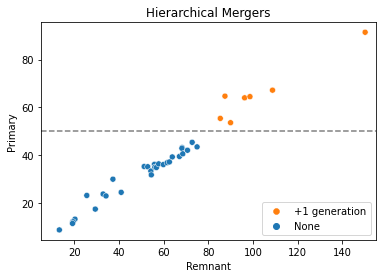

In [33]:
x_50 = BlackHoles_updated[[('Primary'), ('Secondary'), ('Remnant')]]
y_50 = BlackHoles_updated['Label_cutoff']

model_50 = RandomForestClassifier(n_estimators=100, oob_score = True, random_state=0)
model_50.fit(x_50, y_50)
print(model_50.score(x_50,y_50))
print(model_50.oob_score_)

RealGW = pd.DataFrame(list(zip(M1, M2, MF)), columns = ['Primary', 'Secondary', 'Remnant'])
labelpredict = model.predict(RealGW)

fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(x = RealGW['Remnant'], y= RealGW['Primary'], hue = labelpredict)

ax.hlines(50,5,155, linestyles = "dashed", colors = 'grey')
plt.xlim(5,155)

plt.title('Hierarchical Mergers')
leg = ax.legend(labels=["+1 generation", "None"], loc = "lower right")

leg.legendHandles[0].set_color('C1')
leg.legendHandles[1].set_color('C0')

plt.show()


We see that the original plot, where we simply extrapolated the value of the primary BH agrees with our random forest model. This confirms that there is basis to assume this extrapolation is correct.

Lets plot to find where the remnant mass will be more likely hierarchical than not

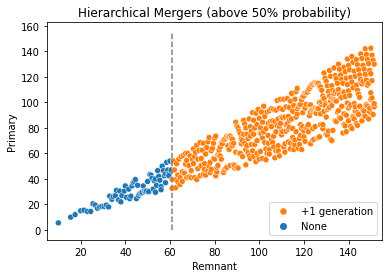

In [34]:
#Find remnant mass for where this 50% probability occurs
cutoff = []
for i in range(len(BlackHoles_updated)):
    if BlackHoles_updated['Label_cutoff'][i] != 0:
        cutoff += [i]
wherecutoff = BlackHoles_updated['Remnant'][cutoff[0]]

fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(data = BlackHoles_updated[::40], x ='Remnant', y= 'Primary', hue = 'Label_cutoff')

ax.vlines(wherecutoff,0,155, linestyles = "dashed", colors = 'grey')
plt.xlim(5,155)

plt.title('Hierarchical Mergers (above 50% probability)')
leg = ax.legend(labels=["+1 generation", "None"], loc = "lower right")

leg.legendHandles[0].set_color('C1')
leg.legendHandles[1].set_color('C0')

plt.show()


We then see that there is a parameter, which I will call 'Hierarchical Plausibility,' which we can use to classify Gravitational Wave events as possible Hierarchical candidates. In the case where we select 50% probability as the cutoff for Hierarchical Plausibility, we see that for any remnant mass greater than 61 solar masses, we are more likely than not dealing with a hierarchical merger scenerio 